In [11]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, accuracy_score
from src.results.reporting import classification_report_2

sys.path.insert(1, "../")
from src.preprocessing.preprocessing_functions import *
from src.preprocessing.process_modelling_data import get_modelling_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the modelling data

In [5]:
(X_train, X_val, X_test, X_train_pca, X_val_pca, X_test_pca, y_train, y_val, y_test) = get_modelling_data()

## AdaBoost Feature Importance

In [170]:
clf_ab = AdaBoostClassifier(n_estimators=800, random_state=0, learning_rate=1)
clf_ab.fit(X_train, y_train)

result = permutation_importance(
    clf_ab, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

feature_names=list(X_train.columns)
imp_m   = pd.Series(result.importances_mean, index=feature_names, name='Importance')
imp_std = pd.Series(result.importances_std, index=feature_names, name='Std')
imp_df = pd.concat([imp_m, imp_std], axis=1)
imp_df = imp_df.sort_values('Importance', ascending=False)
imp_df = imp_df.iloc[:15][::-1]

plt.figure(figsize=(5, 8))
y_pos = np.arange(len(imp_df.index))
plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
plt.xlabel('Importance Score')
plt.yticks(y_pos)
plt.yticks(y_pos, imp_df.index)
plt.title('AdaBoost: Top 15 Important Features')
plt.gca().xaxis.grid(True)
plt.show()

AdaBoostClassifier(learning_rate=1, n_estimators=800, random_state=0)

## XGBoost Feature Importance

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


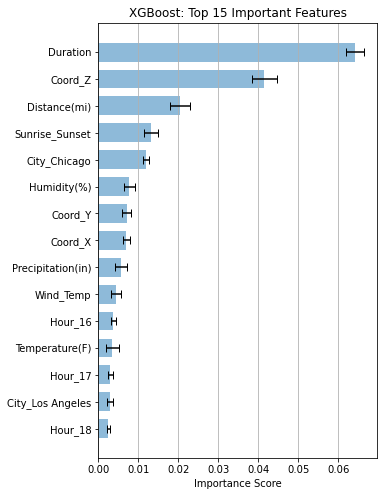

In [12]:
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=10)
clf_xg.fit(X_train, y_train)

result_xg = permutation_importance(
    clf_xg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

feature_names=list(X_train.columns)
imp_m   = pd.Series(result_xg.importances_mean, index=feature_names, name='Importance')
imp_std = pd.Series(result_xg.importances_std, index=feature_names, name='Std')
imp_df = pd.concat([imp_m, imp_std], axis=1)
imp_df = imp_df.sort_values('Importance', ascending=False)
imp_df = imp_df.iloc[:15][::-1]

plt.figure(figsize=(5, 8))
y_pos = np.arange(len(imp_df.index))
plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
plt.xlabel('Importance Score')
plt.yticks(y_pos)
plt.yticks(y_pos, imp_df.index)
plt.title('XGBoost: Top 15 Important Features')
plt.gca().xaxis.grid(True)
plt.show()

## Gradient Boosting Feature Importance

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


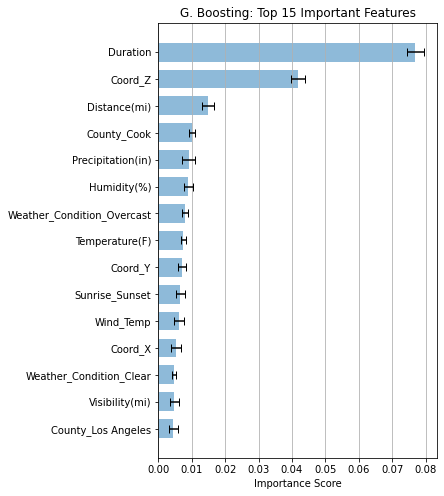

In [167]:
start_time = time.time()
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
            max_depth=20, random_state=0).fit(X_train, y_train)


result_gb = permutation_importance(
    clf_gb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

feature_names=list(X_train.columns)
imp_m   = pd.Series(result_gb.importances_mean, index=feature_names, name='Importance')
imp_std = pd.Series(result_gb.importances_std, index=feature_names, name='Std')
imp_df = pd.concat([imp_m, imp_std], axis=1)
imp_df = imp_df.sort_values('Importance', ascending=False)
imp_df = imp_df.iloc[:15][::-1]

plt.figure(figsize=(5, 8))
y_pos = np.arange(len(imp_df.index))
plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
plt.xlabel('Importance Score')
plt.yticks(y_pos)
plt.yticks(y_pos, imp_df.index)
plt.title('G. Boosting: Top 15 Important Features')
plt.gca().xaxis.grid(True)
plt.show()

## Random Forest Feature Importance

In [171]:
best_param_dict = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto',
                   'max_depth': None, 'criterion': 'gini'}
    
clf_rf = RandomForestClassifier(random_state = 44,
                                n_estimators = best_param_dict['n_estimators'],
                                max_depth = best_param_dict['max_depth'],
                                min_samples_split = best_param_dict['min_samples_split'], 
                                min_samples_leaf = best_param_dict['min_samples_leaf'],
                                criterion = best_param_dict['criterion'],
                                max_features = best_param_dict['max_features']).fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

result_rf = permutation_importance(
    clf_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

feature_names=list(X_train.columns)
imp_m   = pd.Series(result_rf.importances_mean, index=feature_names, name='Importance')
imp_std = pd.Series(result_rf.importances_std, index=feature_names, name='Std')
imp_df = pd.concat([imp_m, imp_std], axis=1)
imp_df = imp_df.sort_values('Importance', ascending=False)
imp_df = imp_df.iloc[:15][::-1]

plt.figure(figsize=(5, 8))
y_pos = np.arange(len(imp_df.index))
plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
plt.xlabel('Importance Score')
plt.yticks(y_pos)
plt.yticks(y_pos, imp_df.index)
plt.title('Random Forest: Top 15 Important Features')
plt.gca().xaxis.grid(True)
plt.show()

## Probability Distribution of Classifiers

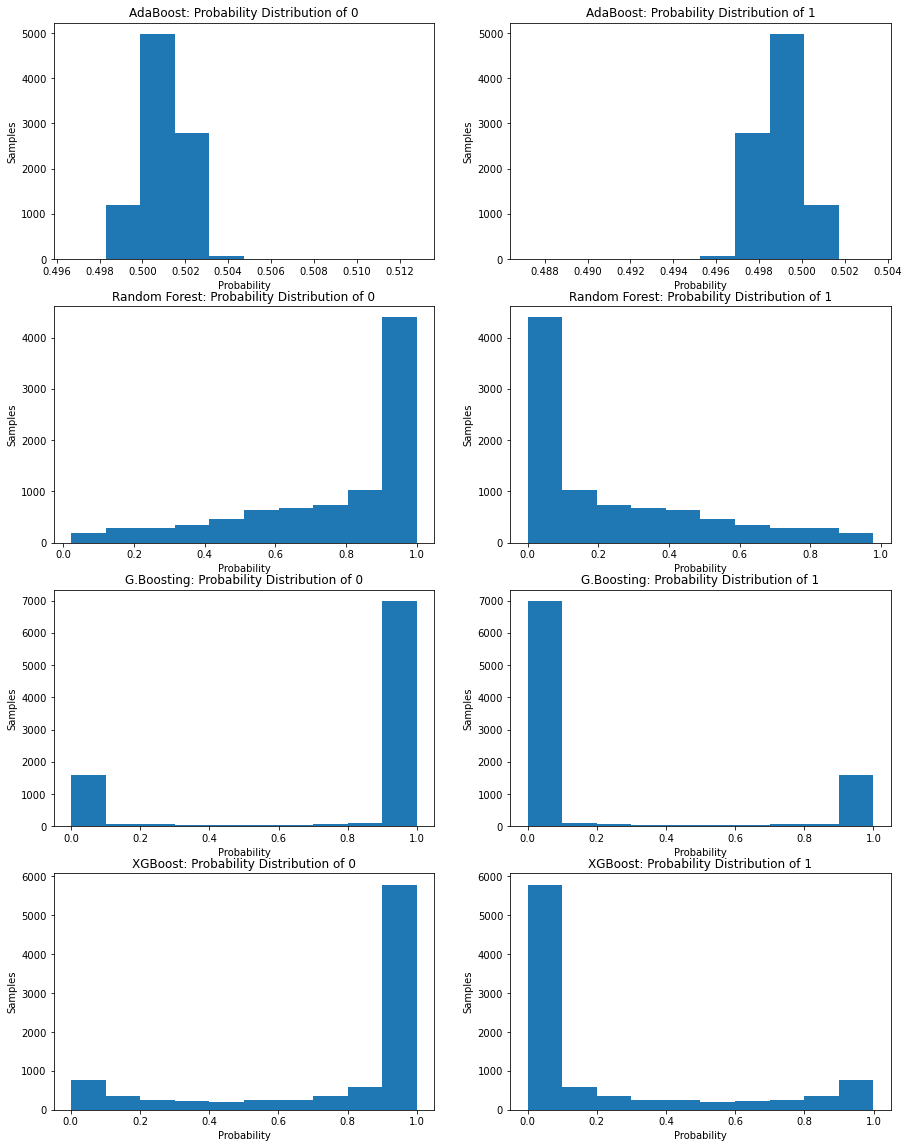

In [174]:
y_prob_ab=clf_ab.predict_proba(X_test)
y_prob_xg=clf_xg.predict_proba(X_test)
y_prob_rf=clf_rf.predict_proba(X_test)
y_prob_gb=clf_gb.predict_proba(X_test)

fig, axs = plt.subplots(4, 2, figsize=(15,20))  

axs[0,0].hist(y_prob_ab[:,0])
axs[0,0].set_title("AdaBoost: Probability Distribution of 0")
axs[0,0].set_xlabel("Probability")
axs[0,0].set_ylabel("Samples")

axs[0,1].hist(y_prob_ab[:,1])
axs[0,1].set_title("AdaBoost: Probability Distribution of 1")
axs[0,1].set_xlabel("Probability")
axs[0,1].set_ylabel("Samples")

axs[1,0].hist(y_prob_rf[:,0])
axs[1,0].set_title("Random Forest: Probability Distribution of 0")
axs[1,0].set_xlabel("Probability")
axs[1,0].set_ylabel("Samples")

axs[1,1].hist(y_prob_rf[:,1])
axs[1,1].set_title("Random Forest: Probability Distribution of 1")
axs[1,1].set_xlabel("Probability")
axs[1,1].set_ylabel("Samples")

axs[2,0].hist(y_prob_gb[:,0])
axs[2,0].set_title("G.Boosting: Probability Distribution of 0")
axs[2,0].set_xlabel("Probability")
axs[2,0].set_ylabel("Samples")

axs[2,1].hist(y_prob_gb[:,1])
axs[2,1].set_title("G.Boosting: Probability Distribution of 1")
axs[2,1].set_xlabel("Probability")
axs[2,1].set_ylabel("Samples")

axs[3,0].hist(y_prob_xg[:,0])
axs[3,0].set_title("XGBoost: Probability Distribution of 0")
axs[3,0].set_xlabel("Probability")
axs[3,0].set_ylabel("Samples")

axs[3,1].hist(y_prob_xg[:,1])
axs[3,1].set_title("XGBoost: Probability Distribution of 1")
axs[3,1].set_xlabel("Probability")
axs[3,1].set_ylabel("Samples")

plt.show()

## Learning Curve XGBoost

### Combine all the learning curves in one chart

In [181]:
clf_xg_max_depth_20 = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=10)

train_sizes_max_depth_20, train_scores_max_depth_20, test_scores_max_depth_20, fit_times_max_depth_20, _ = learning_curve(
    clf_xg_max_depth_20,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

clf_xg_max_depth_8 = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=8, \
                learning_rate=0.3)

train_sizes_max_depth_8, train_scores_max_depth_8, test_scores_max_depth_8, fit_times_max_depth_8, _ = learning_curve(
    clf_xg_max_depth_8,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

clf_xg_max_depth_3 = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=3, \
                learning_rate=0.3)

train_sizes_max_depth_3, train_scores_max_depth_3, test_scores_max_depth_3, fit_times_max_depth_3, _ = learning_curve(
    clf_xg_max_depth_3,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

clf_xg_reg_50 = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=50)

train_sizes_reg_50, train_scores_reg_50, test_scores_reg_50, fit_times_reg_50, _ = learning_curve(
    clf_xg_reg_50,
    X_train,
    y_train,
    cv=4,
    n_jobs=2,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


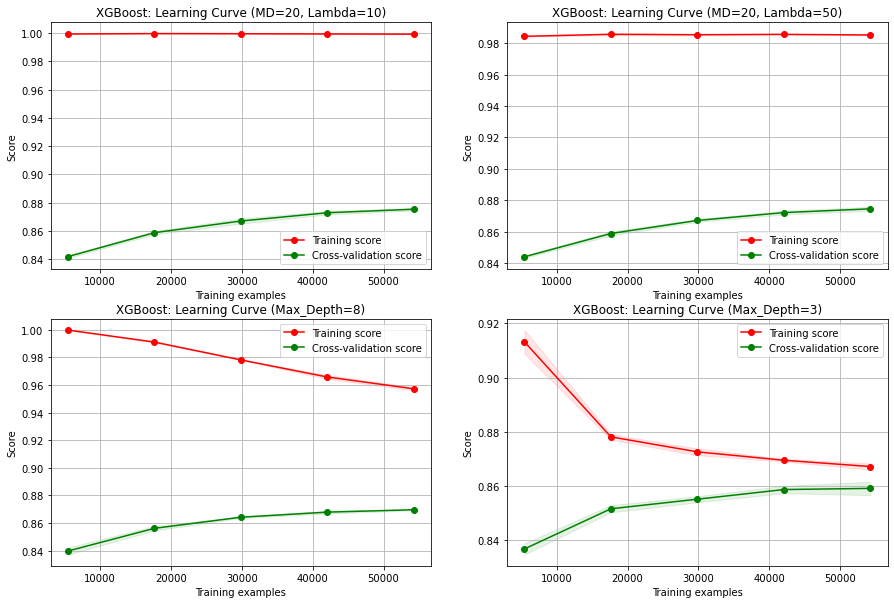

In [190]:
train_scores_mean_depth_20 = np.mean(train_scores_max_depth_20, axis=1)
train_scores_std_depth_20 = np.std(train_scores_max_depth_20, axis=1)
test_scores_mean_depth_20 = np.mean(test_scores_max_depth_20, axis=1)
test_scores_std_depth_20 = np.std(test_scores_max_depth_20, axis=1)
fit_times_mean_depth_20 = np.mean(fit_times_max_depth_20, axis=1)
fit_times_std_depth_20 = np.std(fit_times_max_depth_20, axis=1)

train_scores_mean_reg_50 = np.mean(train_scores_reg_50, axis=1)
train_scores_std_reg_50 = np.std(train_scores_reg_50, axis=1)
test_scores_mean_reg_50 = np.mean(test_scores_reg_50, axis=1)
test_scores_std_reg_50 = np.std(test_scores_reg_50, axis=1)
fit_times_mean_reg_50 = np.mean(fit_times_reg_50, axis=1)
fit_times_std_reg_50 = np.std(fit_times_reg_50, axis=1)

train_scores_mean_depth_8 = np.mean(train_scores_max_depth_8, axis=1)
train_scores_std_depth_8 = np.std(train_scores_max_depth_8, axis=1)
test_scores_mean_depth_8 = np.mean(test_scores_max_depth_8, axis=1)
test_scores_std_depth_8 = np.std(test_scores_max_depth_8, axis=1)
fit_times_mean_depth_8 = np.mean(fit_times_max_depth_8, axis=1)
fit_times_std_depth_8 = np.std(fit_times_max_depth_8, axis=1)

train_scores_mean_depth_3 = np.mean(train_scores_max_depth_3, axis=1)
train_scores_std_depth_3 = np.std(train_scores_max_depth_3, axis=1)
test_scores_mean_depth_3 = np.mean(test_scores_max_depth_3, axis=1)
test_scores_std_depth_3 = np.std(test_scores_max_depth_3, axis=1)
fit_times_mean_depth_3 = np.mean(fit_times_max_depth_3, axis=1)
fit_times_std_depth_3 = np.std(fit_times_max_depth_3, axis=1)


fig, axs = plt.subplots(2, 2, figsize=(15,10)) 

## Depth 20, Lambda=10
axs[0, 0].grid()
axs[0, 0].fill_between(
    train_sizes_max_depth_20,
    train_scores_mean_depth_20 - train_scores_std_depth_20,
    train_scores_mean_depth_20 + train_scores_std_depth_20,
    alpha=0.1,
    color="r",
)
axs[0, 0].fill_between(
    train_sizes_max_depth_20,
    test_scores_mean_depth_20 - test_scores_std_depth_20,
    test_scores_mean_depth_20 + test_scores_std_depth_20,
    alpha=0.1,
    color="g",
)
axs[0, 0].plot(
    train_sizes_max_depth_20, train_scores_mean_depth_20, "o-", color="r", label="Training score"
)
axs[0, 0].plot(
    train_sizes_max_depth_20, test_scores_mean_depth_20, "o-", color="g", label="Cross-validation score"
)
axs[0, 0].legend(loc="best")
axs[0, 0].set_xlabel("Training examples")
axs[0, 0].set_ylabel("Score")
axs[0, 0].set_title("XGBoost: Learning Curve (MD=20, Lambda=10)")

## Depth 20, Lambda=50
axs[0, 1].grid()
axs[0, 1].fill_between(
    train_sizes_reg_50,
    train_scores_mean_reg_50 - train_scores_std_reg_50,
    train_scores_mean_reg_50 + train_scores_std_reg_50,
    alpha=0.1,
    color="r",
)
axs[0, 1].fill_between(
    train_sizes_reg_50,
    test_scores_mean_reg_50 - test_scores_std_reg_50,
    test_scores_mean_reg_50 + test_scores_std_reg_50,
    alpha=0.1,
    color="g",
)
axs[0, 1].plot(
    train_sizes_reg_50, train_scores_mean_reg_50, "o-", color="r", label="Training score"
)
axs[0, 1].plot(
    train_sizes_reg_50, test_scores_mean_reg_50, "o-", color="g", label="Cross-validation score"
)
axs[0, 1].legend(loc="best")
axs[0, 1].set_xlabel("Training examples")
axs[0, 1].set_ylabel("Score")
axs[0, 1].set_title("XGBoost: Learning Curve (MD=20, Lambda=50)")

## Depth 8
axs[1, 0].grid()
axs[1, 0].fill_between(
    train_sizes_max_depth_8,
    train_scores_mean_depth_8 - train_scores_std_depth_8,
    train_scores_mean_depth_8 + train_scores_std_depth_8,
    alpha=0.1,
    color="r",
)
axs[1, 0].fill_between(
    train_sizes_max_depth_8,
    test_scores_mean_depth_8 - test_scores_std_depth_8,
    test_scores_mean_depth_8 + test_scores_std_depth_8,
    alpha=0.1,
    color="g",
)
axs[1, 0].plot(
    train_sizes_max_depth_8, train_scores_mean_depth_8, "o-", color="r", label="Training score"
)
axs[1, 0].plot(
    train_sizes_max_depth_8, test_scores_mean_depth_8, "o-", color="g", label="Cross-validation score"
)
axs[1, 0].legend(loc="best")
axs[1, 0].set_xlabel("Training examples")
axs[1, 0].set_ylabel("Score")
axs[1, 0].set_title("XGBoost: Learning Curve (Max_Depth=8)")

## Depth 3
axs[1, 1].grid()
axs[1, 1].fill_between(
    train_sizes_max_depth_3,
    train_scores_mean_depth_3 - train_scores_std_depth_3,
    train_scores_mean_depth_3 + train_scores_std_depth_3,
    alpha=0.1,
    color="r",
)
axs[1, 1].fill_between(
    train_sizes_max_depth_3,
    test_scores_mean_depth_3 - test_scores_std_depth_3,
    test_scores_mean_depth_3 + test_scores_std_depth_3,
    alpha=0.1,
    color="g",
)
axs[1, 1].plot(
    train_sizes_max_depth_3, train_scores_mean_depth_3, "o-", color="r", label="Training score"
)
axs[1, 1].plot(
    train_sizes_max_depth_3, test_scores_mean_depth_3, "o-", color="g", label="Cross-validation score"
)
axs[1, 1].legend(loc="best")
axs[1, 1].set_xlabel("Training examples")
axs[1, 1].set_ylabel("Score")
axs[1, 1].set_title("XGBoost: Learning Curve (Max_Depth=3)")

plt.show()

### Max-Depth=8

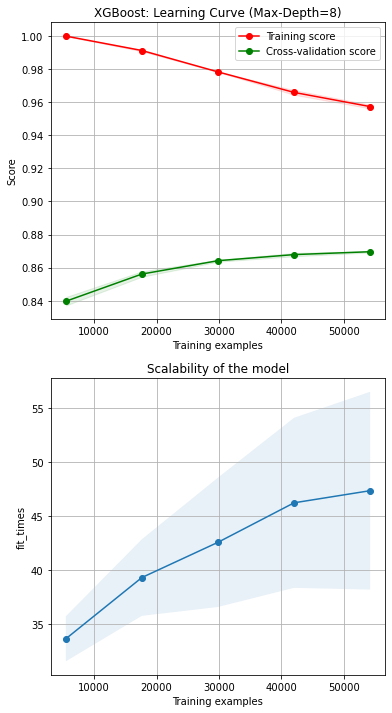

In [148]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=8, \
                learning_rate=0.3)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve (Max-Depth=8)")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

### Max-Depth=20

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


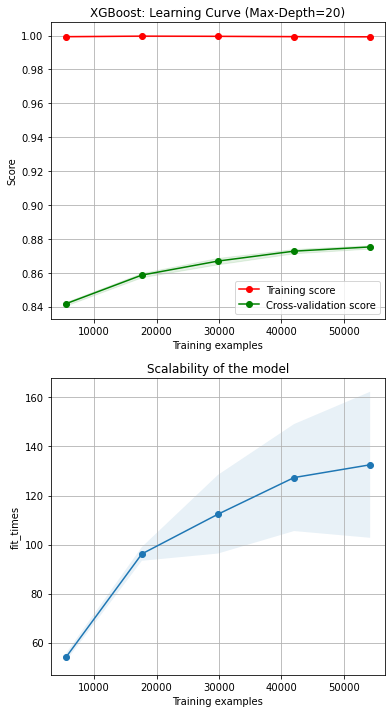

In [149]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=10)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve (Max-Depth=20)")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

### Max-Depth 3

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


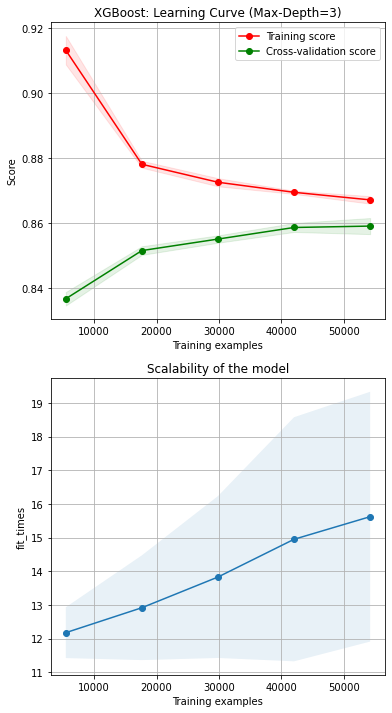

In [150]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=3, \
                learning_rate=0.3)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve (Max-Depth=3)")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


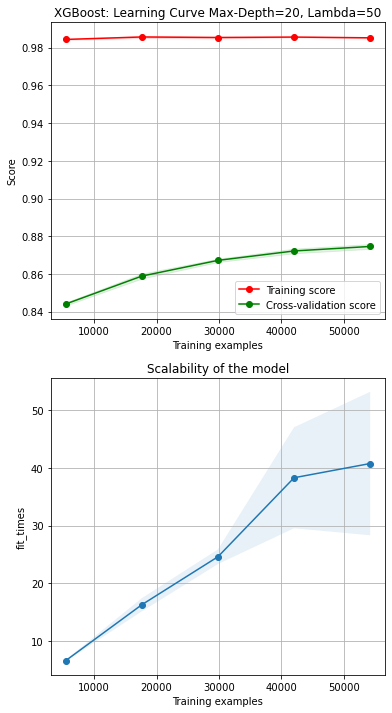

In [152]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=50)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=2,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve Max-Depth=20, Lambda=50")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

In [179]:
start_time = time.time()
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=20, random_state=0).fit(X_train, y_train)
train_time = time.time() - start_time
print(f"train_time {train_time}")

train_time 148.20217204093933


In [165]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(classification_report_2(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6966
           1       0.76      0.66      0.70      2077

    accuracy                           0.87      9043
   macro avg       0.83      0.80      0.81      9043
weighted avg       0.87      0.87      0.87      9043

Overall Accuracy: 87.27 %
Class 0 accuracy: 93.71 %
Class 1 accuracy: 65.67 %
Class 1 accuracy: 65.67 %
Specificity: 0.94
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6528    |     438     |  6966 |
| Actual 1 |     713     |     1364    |  2077 |
|  Total   |     7241    |     1802    |  9043 |
+----------+-------------+-------------+-------+
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6966
           1       0.76      0.66      0.70      2077

    accuracy              